In [1]:
import torch
import torch.nn as nn
import numpy as np

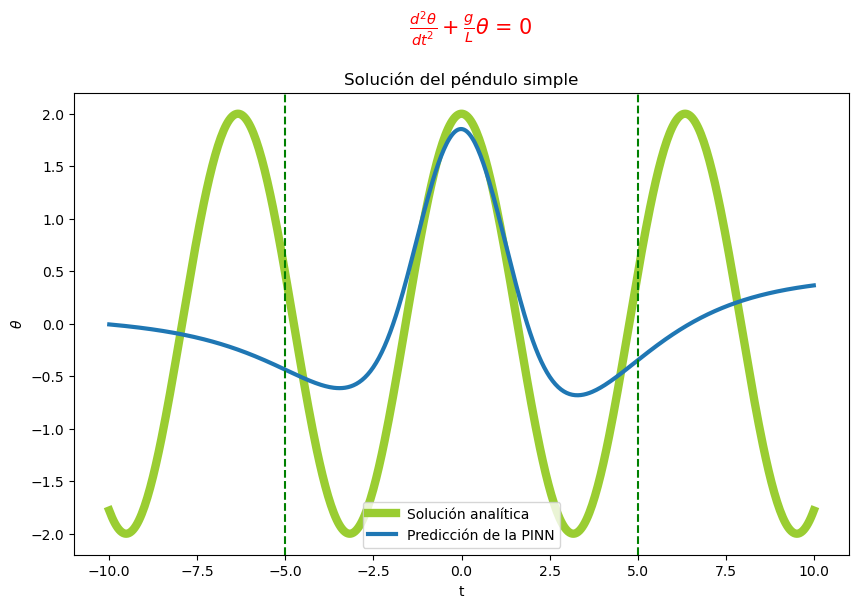

In [2]:
import torch
import torch.nn as nn
import numpy as np
#Implementamos la estructura de la NN
class NeuralNet(nn.Module):
    def __init__(self, hidden_size, output_size=1,input_size=1):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.Tanh()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.Tanh()
        self.l3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.Tanh()
        self.l4 = nn.Linear(hidden_size, hidden_size)
        self.relu4 = nn.Tanh()
        self.l5 = nn.Linear(hidden_size, hidden_size)
        self.relu5 = nn.Tanh()
        self.l6 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        out = self.relu2(out)
        out = self.l3(out)
        out = self.relu3(out)
        out = self.l4(out)
        out = self.relu4(out)
        out = self.l5(out)
        out = self.relu5(out)
        out = self.l6(out)
        return out
#Creamos el criterio de la funcion L_Data
criterion = nn.MSELoss()

# Define la funcion de costo y condiciones iniciales
def initial_condition_loss(y, target_value):
    return nn.MSELoss()(y, target_value)

# Vector de tiempo como entrada de la NN
t_numpy = np.arange(-5, 5+0.01, 0.001, dtype=np.float32)
t = torch.from_numpy(t_numpy).reshape(len(t_numpy), 1)
t.requires_grad_(True)


g = 9.8
L = 10

# Iniciamos las neuronas
model = NeuralNet(hidden_size=50)

# Costo y omptimizador
learning_rate = 8e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# epocas
num_epochs = int(1e3)

for epoch in range(num_epochs):

    
    epsilon = torch.normal(0,0.1, size=(len(t),1)).float()
    t_train = t + epsilon

    # Forward pass
    y_pred = model(t_train)

    # Caalcular la derivada del forward pass
    dy_dt = torch.autograd.grad(y_pred, 
                                t_train, 
                                grad_outputs=torch.ones_like(y_pred), 
                                create_graph=True)[0]
    d2y_dt2 = torch.autograd.grad(dy_dt, 
                                t_train, 
                                grad_outputs=torch.ones_like(dy_dt), 
                                create_graph=True)[0]
    

    # Funcion física
    loss_DE = criterion(d2y_dt2 + (g/L)*y_pred, torch.zeros_like(d2y_dt2))

    # Condicion inicial 
    loss_IC = initial_condition_loss(model(torch.tensor([[0.0]])), 
                                     torch.tensor([[2.0]]))

    loss = loss_DE + loss_IC

    # Backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
g=9.8
L=10

# Función para la solución analítica
def pendulo_simple(t):
    omega = np.sqrt(g / L)  # Frecuencia angular
    theta = 2* np.cos(omega * t) # Solución analítica del ángulo
    return theta

# Genera puntos de tiempo para evaluar la solución
t_test = torch.linspace(-10, 10, 500).reshape(-1, 1)

# Evalúa la red neuronal en los puntos de tiempo de prueba
with torch.no_grad():
    y_pred_test = model(t_test)

# Calcula la solución analítica en los mismos puntos de tiempo
y_analytical = pendulo_simple(t_test.numpy())

# Gráfica de la solución predicha por la red neuronal y la solución analítica
plt.figure(figsize=(10, 6))
plt.plot(t_test.numpy(), y_analytical, lw=6, color='yellowgreen',label='Solución analítica')
plt.plot(t_test.numpy(), y_pred_test.numpy(), lw=3, label='Predicción de la PINN')
plt.xlabel('t')
plt.ylabel(r'$\theta$')
plt.title('Solución del péndulo simple')
plt.axvline(x=-5, color='g', linestyle='--')  # Línea vertical en t = -5
plt.axvline(x=5, color='g', linestyle='--' )   # Línea vertical en t = 5
plt.text(-1.5, 2.75, r'$\frac{d^2\theta}{dt^2} +\frac{g}{L}\theta$ = 0', fontsize=15, color='r')
plt.legend()
#plt.savefig('PenduloSimpleFull.png')
plt.show()


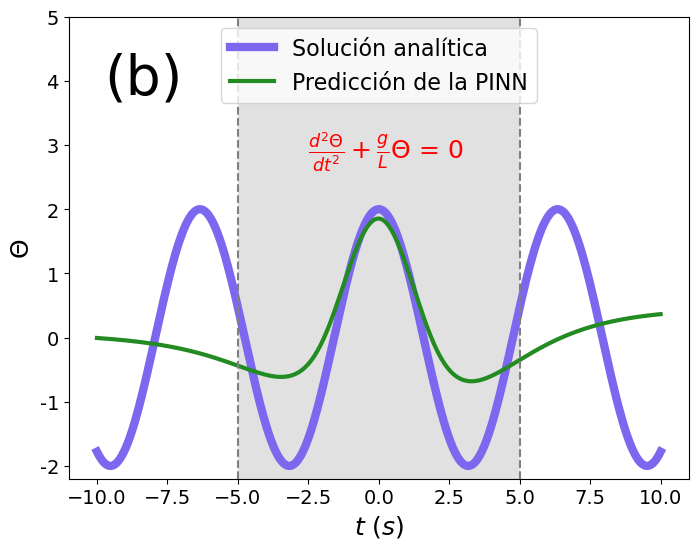

In [18]:
# Gráfica de la solución predicha por la red neuronal y la solución analítica
plt.figure(figsize=(8, 6))
plt.plot(t_test.numpy(), y_analytical, lw=6, color='mediumslateblue',label='Solución analítica')
plt.plot(t_test.numpy(), y_pred_test.numpy(), lw=3, color='forestgreen', label='Predicción de la PINN')
plt.xlabel('$t~(s)$',fontsize=18)
plt.ylabel(r'$\Theta$',fontsize=18)
#plt.title('Solución con GridSearch')
plt.axvline(x=-5, color='gray', linestyle='--')  # Línea vertical en t = -5
plt.axvline(x=5, color='gray', linestyle='--' )   # Línea vertical en t = 5
plt.text(-2.5, 2.8, r'$\frac{d^2\Theta}{dt^2} +\frac{g}{L}\Theta$ = 0', fontsize=18, color='red')
plt.text(-9.75, 3.8, '(b)', fontsize=40, color='k')

plt.axvspan(-5, 5, facecolor='gray', alpha=0.23)
custom_ticks = [-2,-1,0,1,2,3,4,5]
plt.xticks(fontsize = 14) 
plt.yticks(custom_ticks, custom_ticks, fontsize=14)

plt.legend(loc= 'upper center',fontsize=16)
plt.savefig('PenduloSimpleWorstInciso.png')
plt.show()
